In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
from rfpimp import *


# Read our  csv data file using pandas Red Wine & White Wine

### df_1 has red wine
### df_2 white wine



In [8]:
df_1= pd.read_csv("C:/Users/Desmond Gukwe/Google Drive/Python Scripts/winequality/winequality/winequality_red.csv"  )
df_2= pd.read_csv("C:/Users/Desmond Gukwe/Google Drive/Python Scripts/winequality/winequality/winequality_white.csv"  )

### Getting basic statistics on red  wine


In [9]:
df_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [13]:
df_1['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

##### Looking at the counts , we see that all the obesavsions have the same values , logical speaking it means there is no missing data hence we won't do any imputations on white wine

### Getting basic statistics on white  wine


In [12]:
df_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [14]:
df_2['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

##### Looking at the counts , we see that all the obesavsions have the same values , logical speaking it means there is no missing data hence we won't do any imputations on Red wine

In [18]:
feat_labels_red_wine =df_1.columns
data=df_1
feat_labels_red_wine

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the Quality.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by Quality
    if continuous:
        sns.boxplot(x=col_name, y='quality', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by quality')
    else:
        Charged_Off_rates = data.groupby(col_name)['ch'].value_counts(normalize=True)[:,1]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction quality')
        ax2.set_title('quality Rate by quality status ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by quality_status
    if continuous:  
        facet = sns.FacetGrid(data, hue = 'quality', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='quality', data=data, order=sorted(data[col_name].unique()) )
     
    plt.tight_layout()

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib

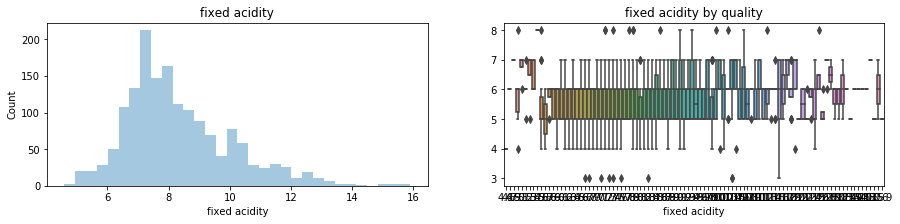

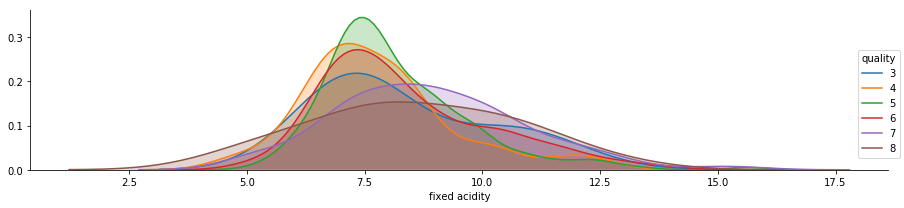

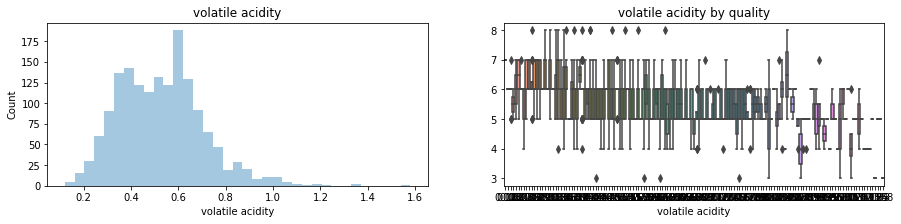

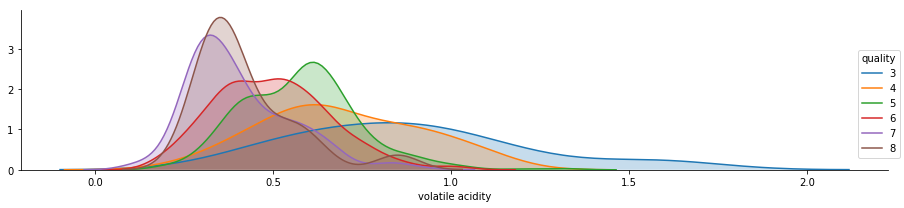

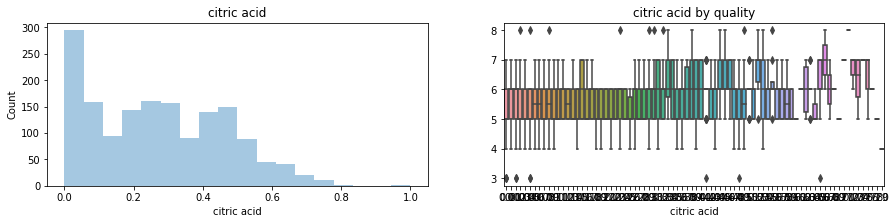

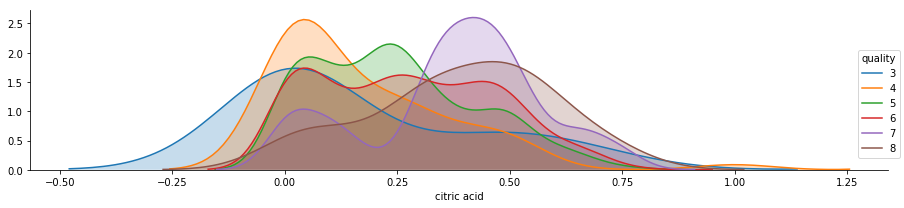

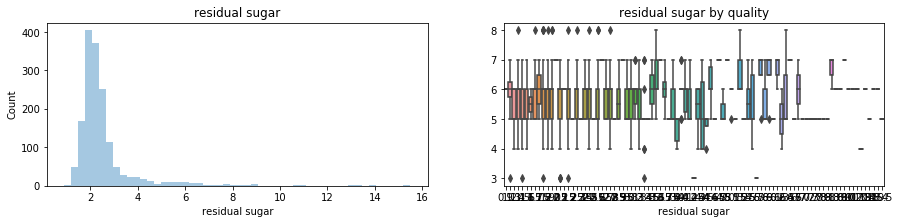

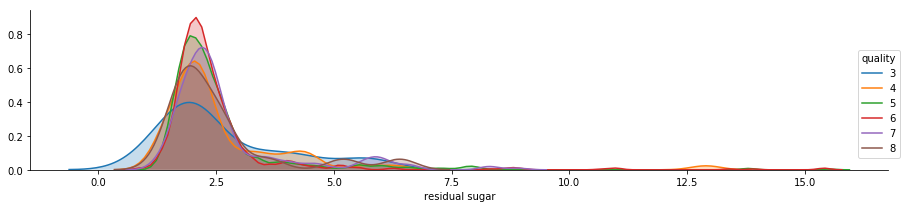

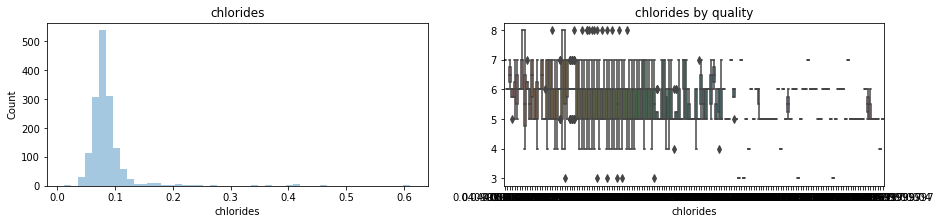

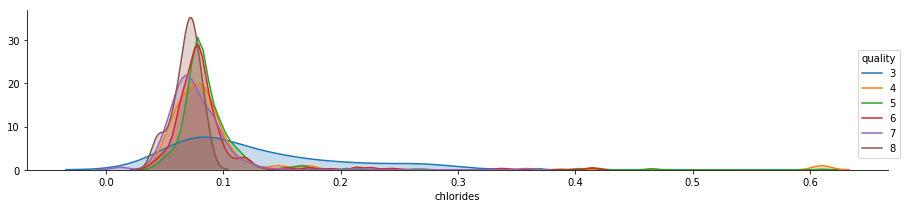

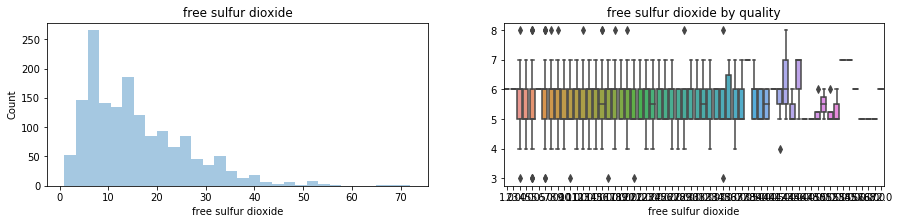

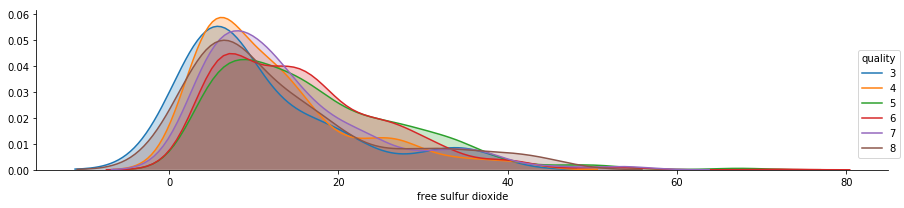

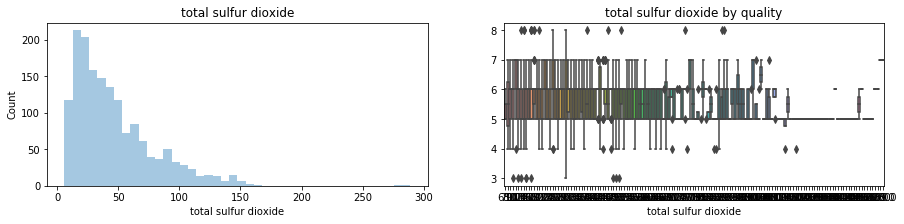

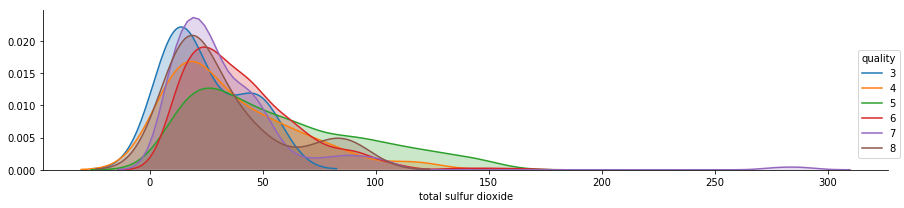

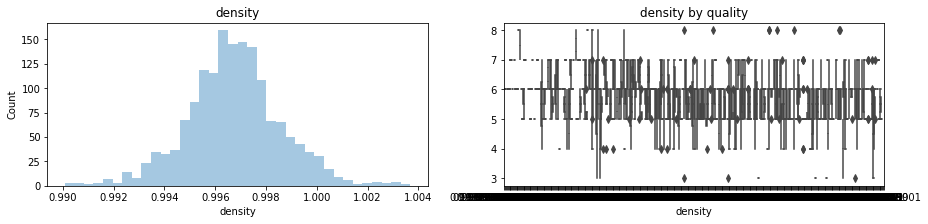

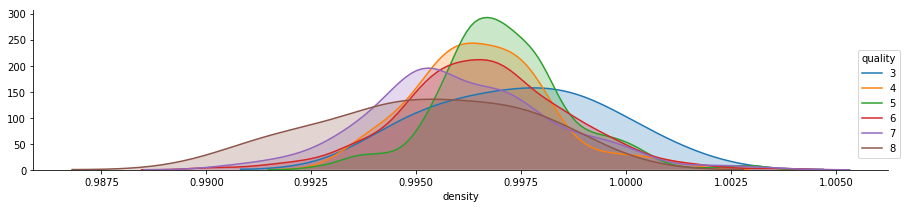

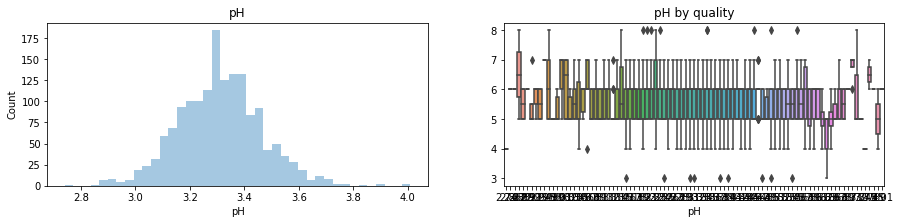

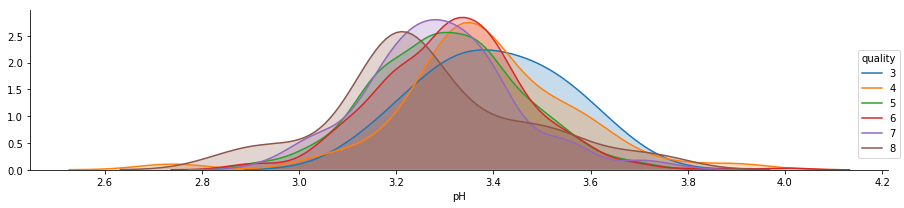

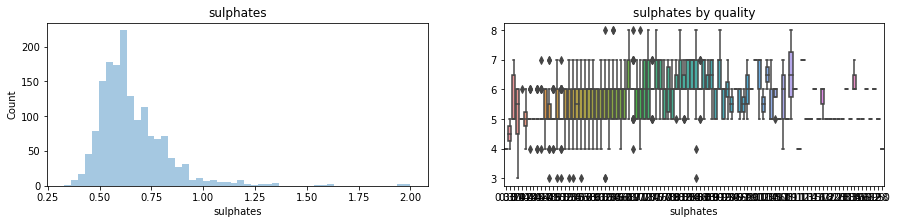

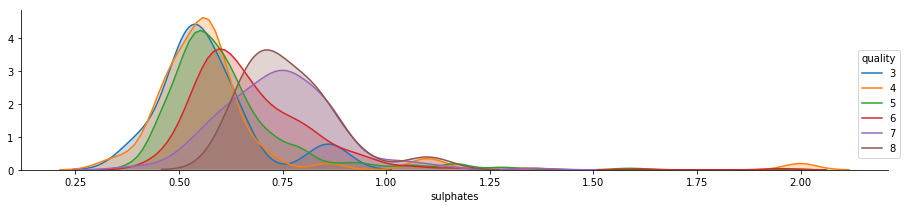

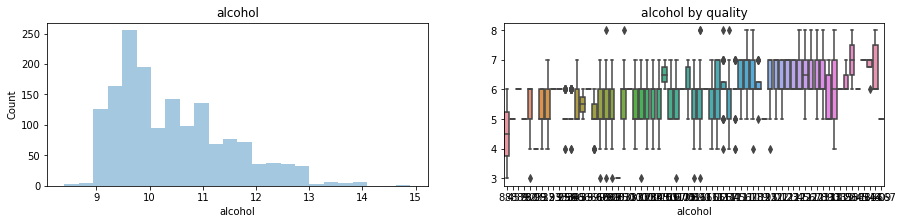

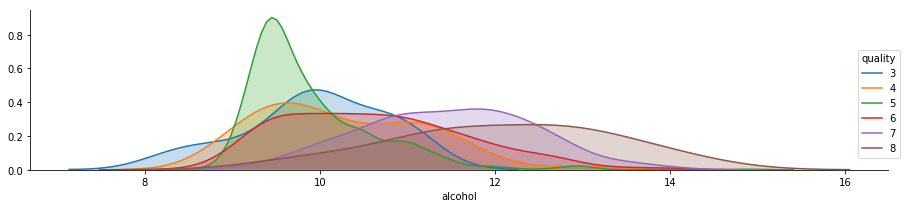

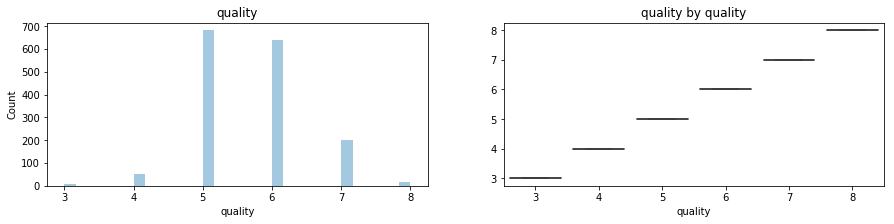

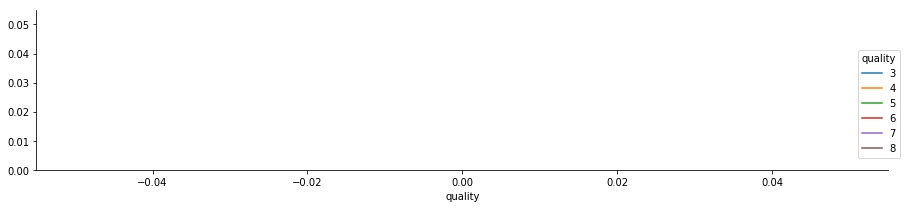

In [20]:
for plot_element in feat_labels_red_wine:
    plot_var(plot_element, plot_element, continuous=True)

### MOST OF OUR DATA IS SKEEWED TO THE RIGHT , HENCE WE NEED THAT TO FOLLOW A NORMAL DISTRIBUTION WE MUST TRANSFORM THOSE VARIABLES USING A lOGs. _____RED WINE

In [21]:
feat_labels_red_wine =df_1.columns
data=df_2
feat_labels_red_wine

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the Quality.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by Quality
    if continuous:
        sns.boxplot(x=col_name, y='quality', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by quality')
    else:
        Charged_Off_rates = data.groupby(col_name)['ch'].value_counts(normalize=True)[:,1]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction quality')
        ax2.set_title('quality Rate by quality status ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by quality_status
    if continuous:  
        facet = sns.FacetGrid(data, hue = 'quality', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='quality', data=data, order=sorted(data[col_name].unique()) )
     
    plt.tight_layout()

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib

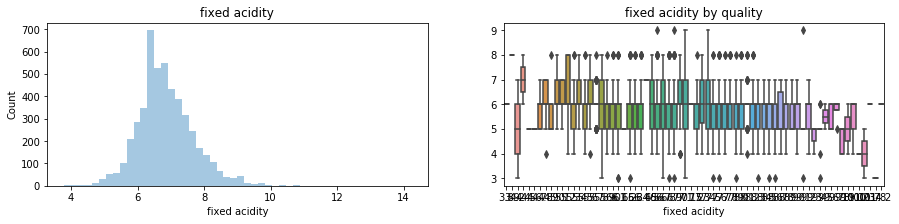

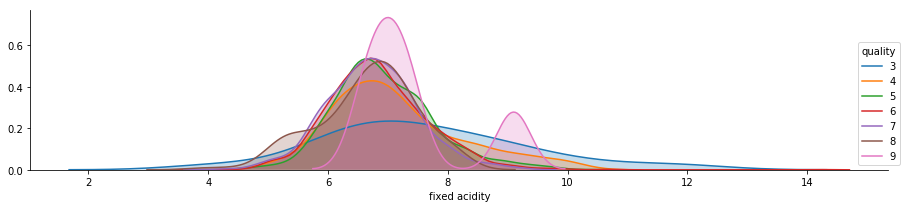

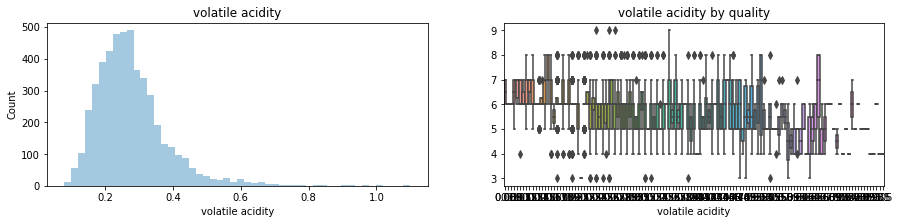

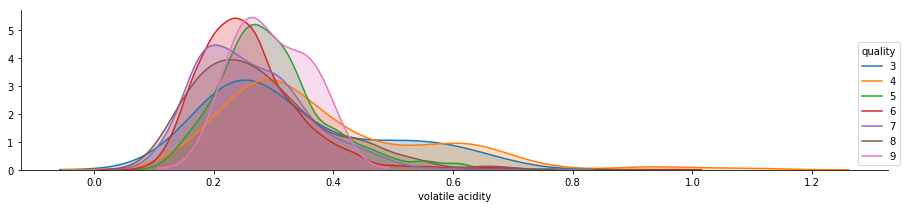

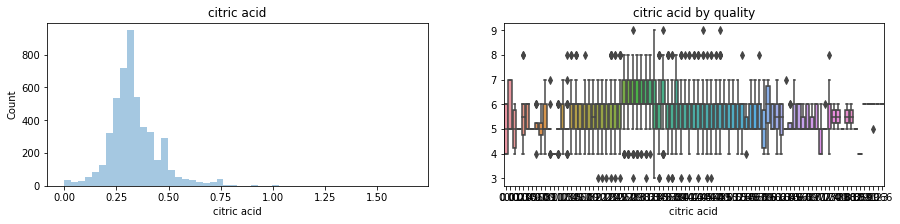

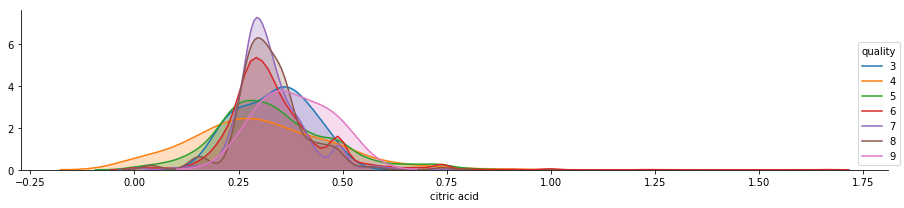

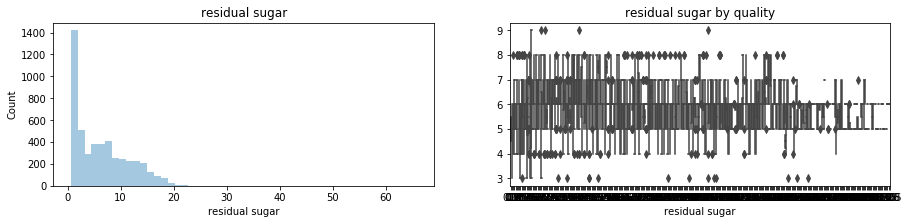

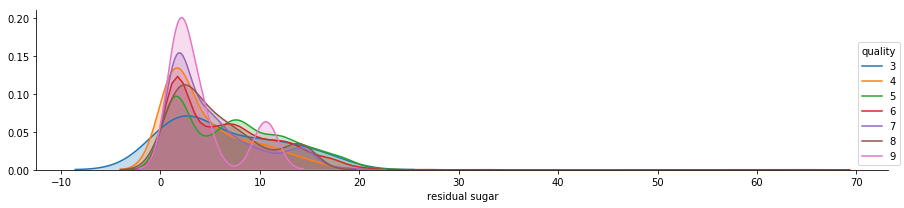

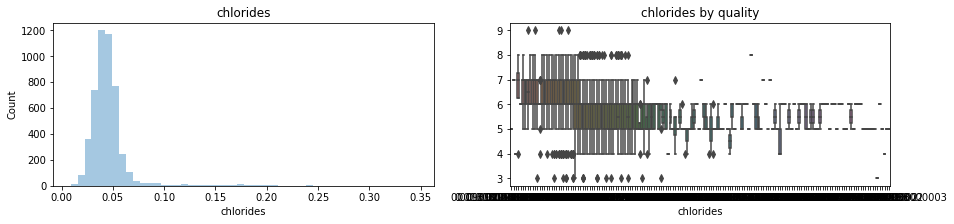

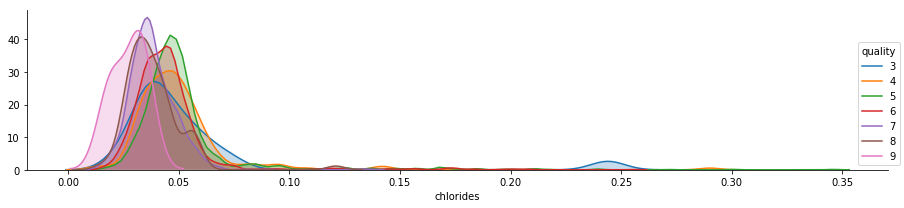

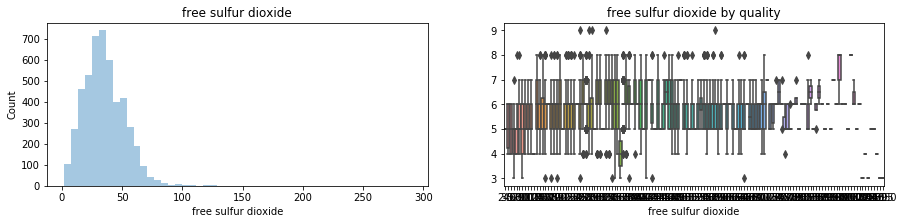

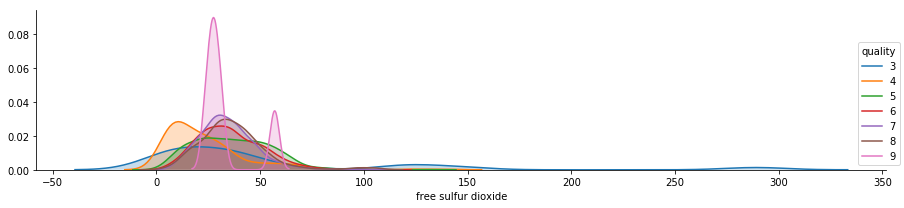

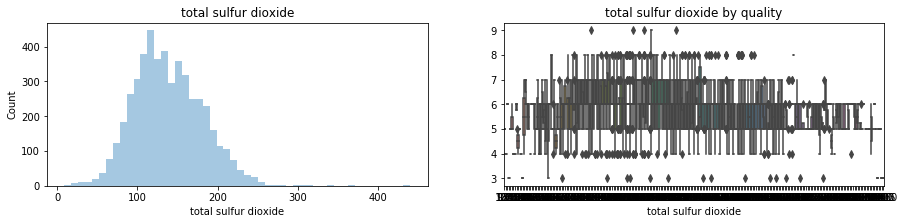

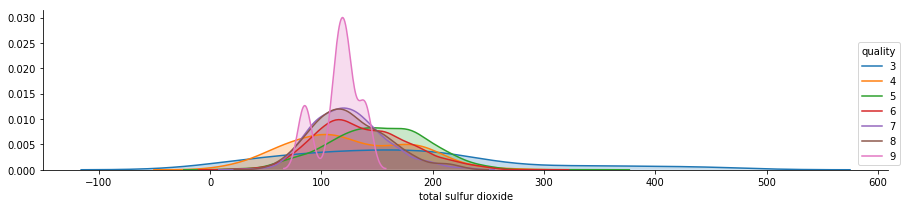

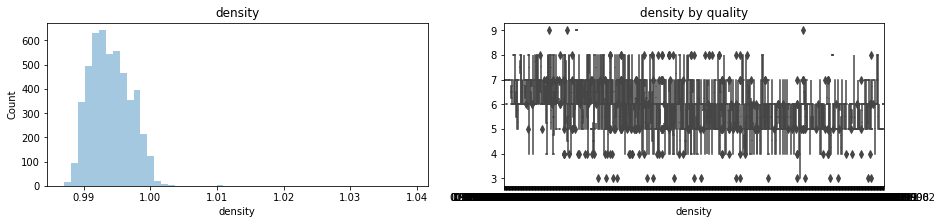

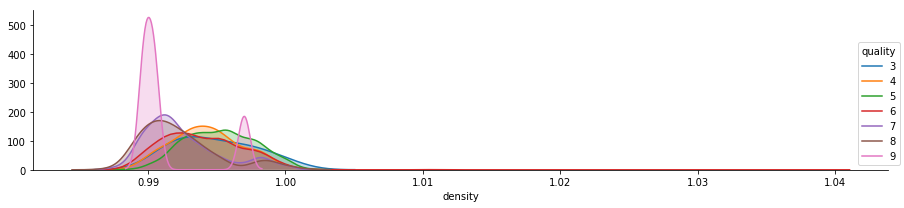

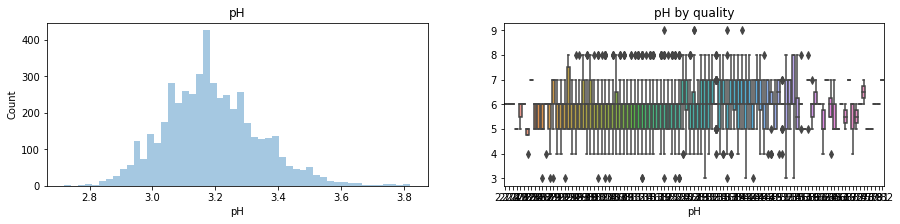

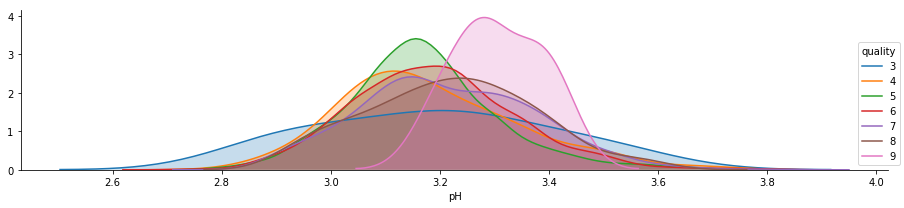

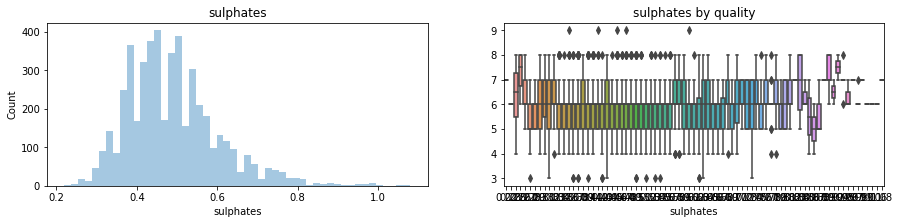

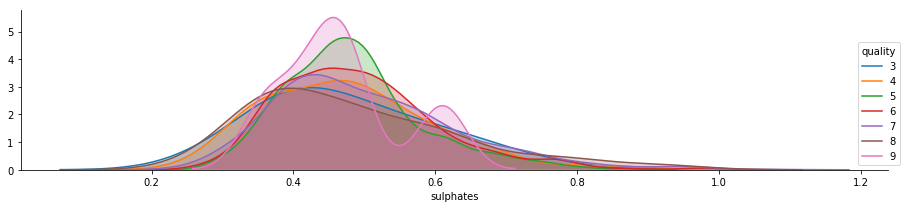

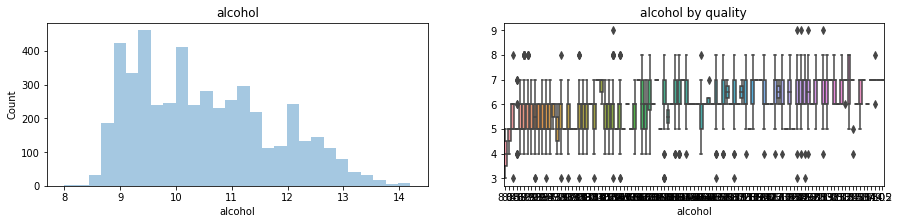

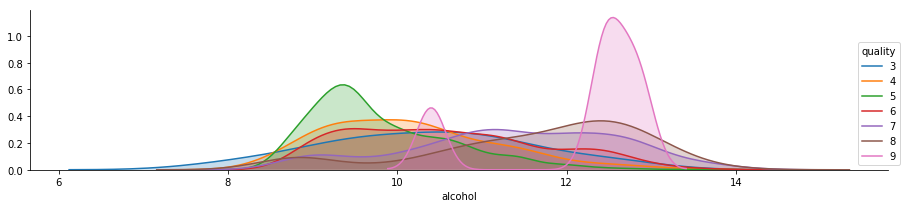

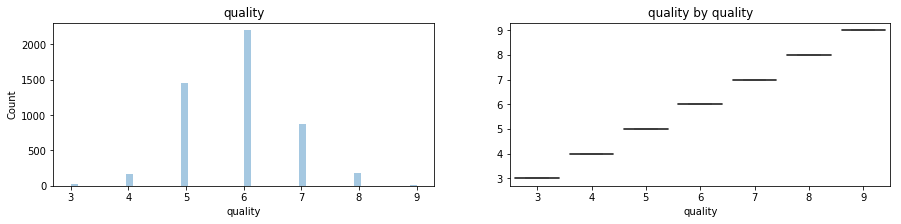

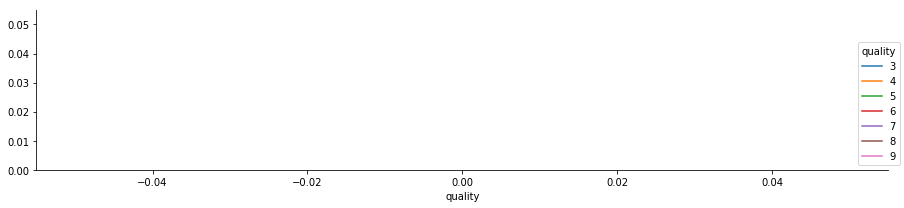

In [23]:
for plot_element in feat_labels_red_wine:
    plot_var(plot_element, plot_element, continuous=True)

### Again we just needed an idea of how our varables are distributed then from there we can combine the the two and start an analysis and build a pridictive model to classify wine quality .

In [26]:

#Merging the data frames 
frames = [df_1, df_2]
Full_df=pd.concat(frames)

In [27]:
Full_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
Full_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [30]:
feat_labels_ =Full_df.columns
data=Full_df
feat_labels_

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [31]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the Quality.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by Quality
    if continuous:
        sns.boxplot(x=col_name, y='quality', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by quality')
    else:
        Charged_Off_rates = data.groupby(col_name)['ch'].value_counts(normalize=True)[:,1]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction quality')
        ax2.set_title('quality Rate by quality status ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by quality_status
    if continuous:  
        facet = sns.FacetGrid(data, hue = 'quality', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='quality', data=data, order=sorted(data[col_name].unique()) )
     
    plt.tight_layout()

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib

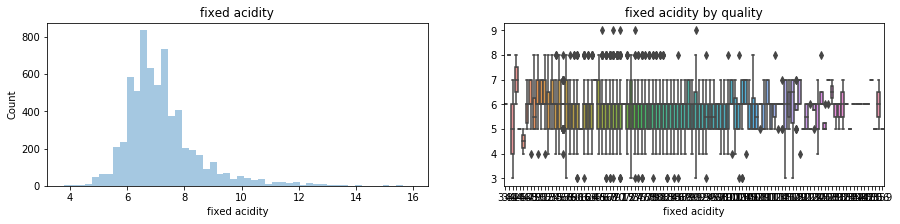

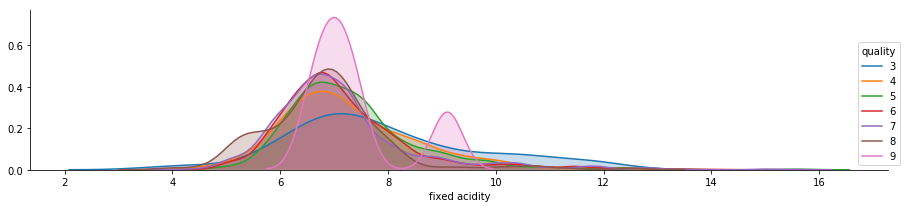

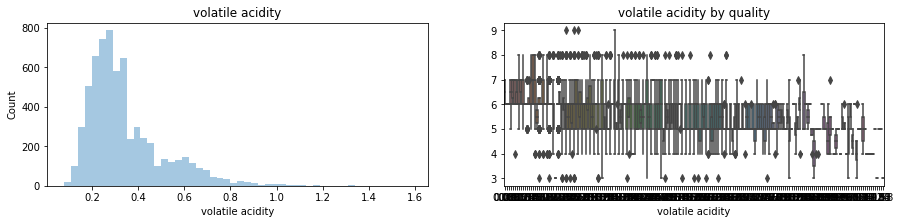

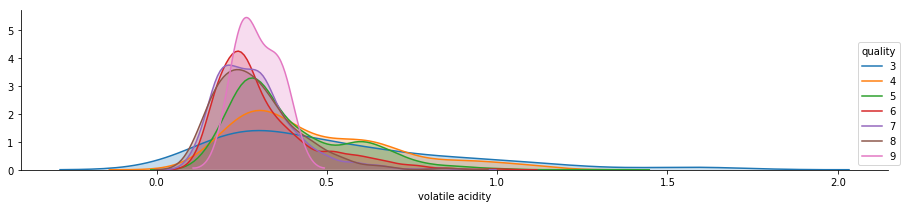

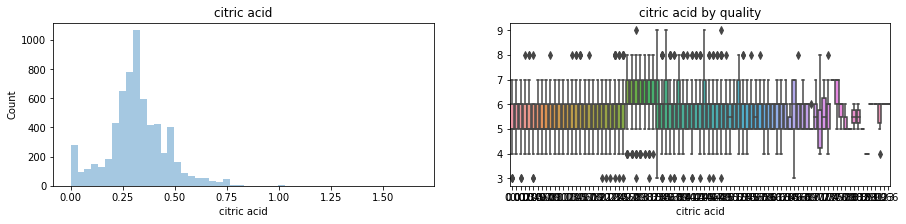

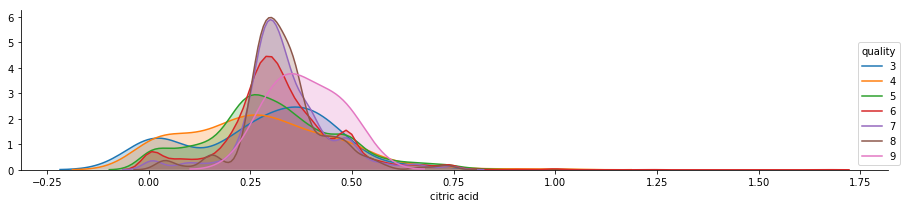

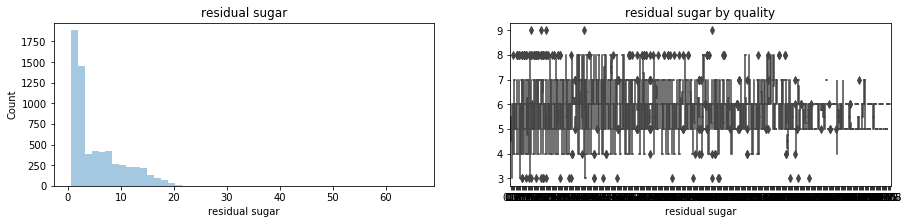

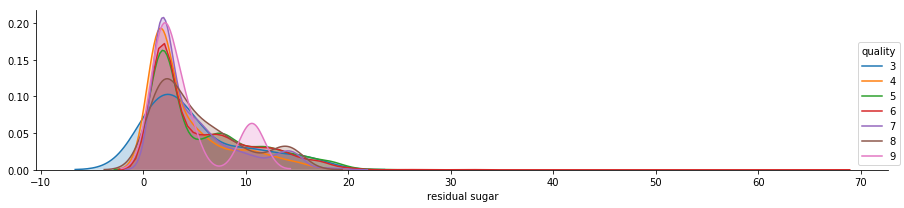

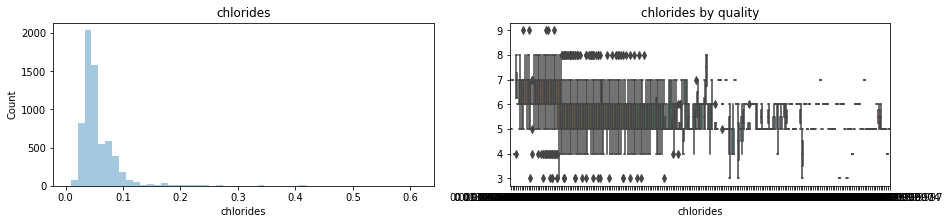

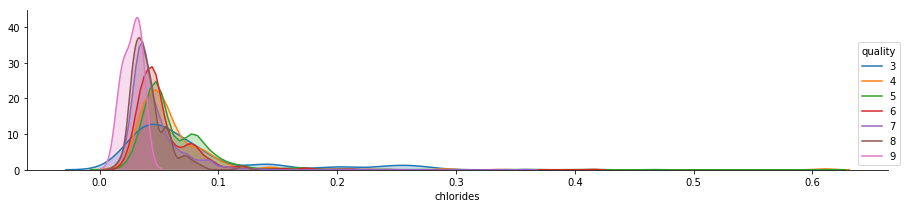

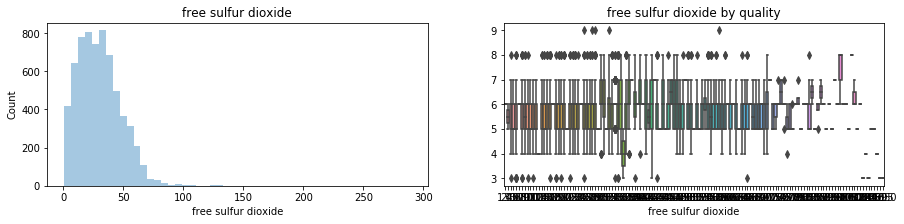

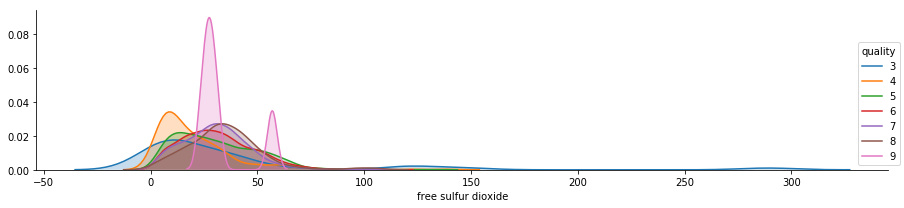

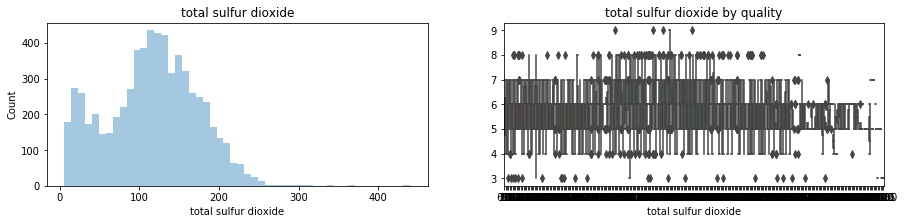

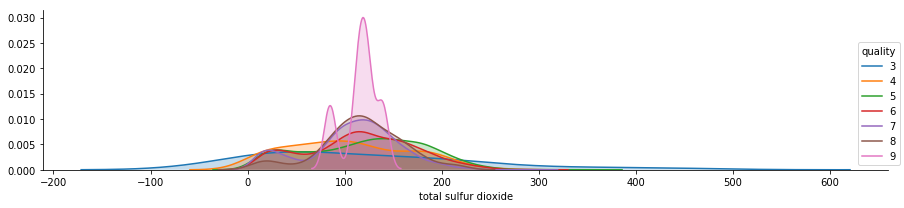

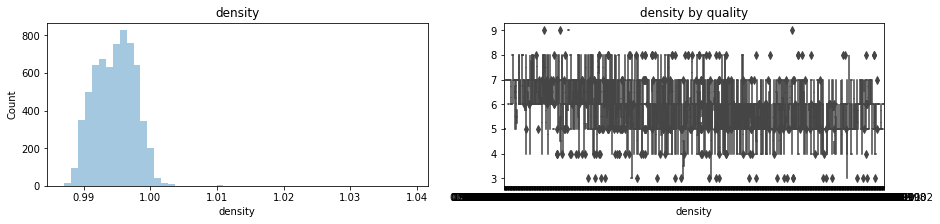

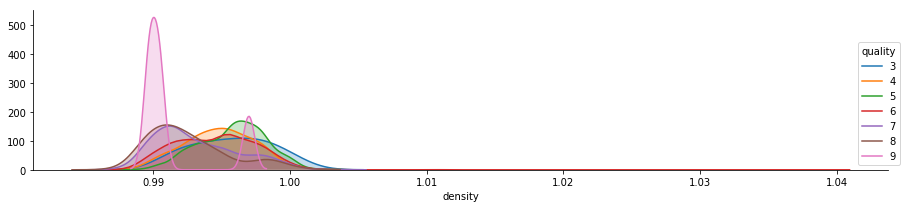

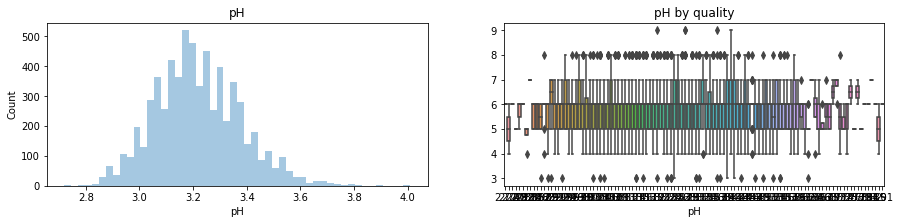

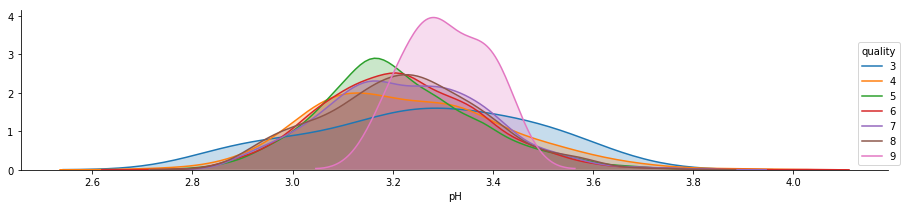

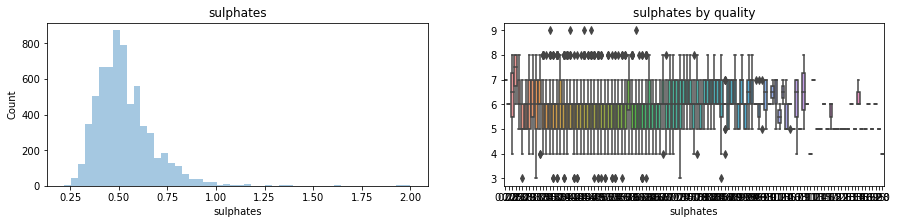

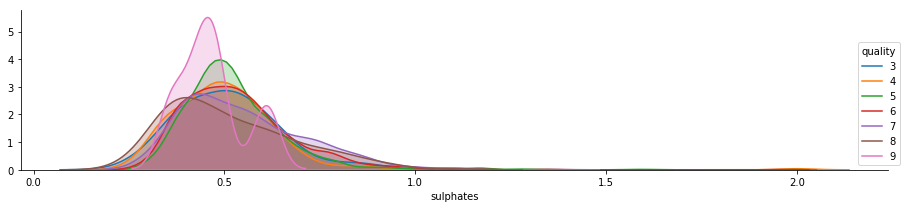

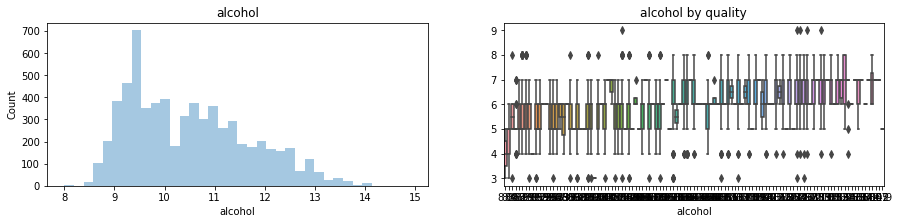

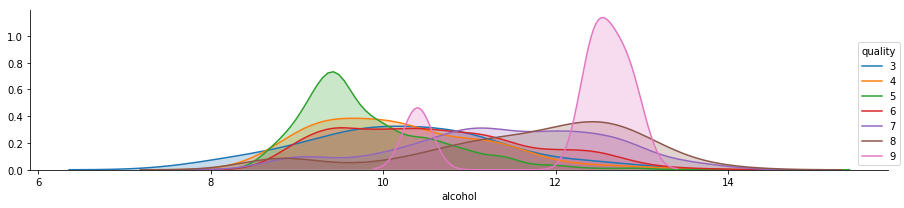

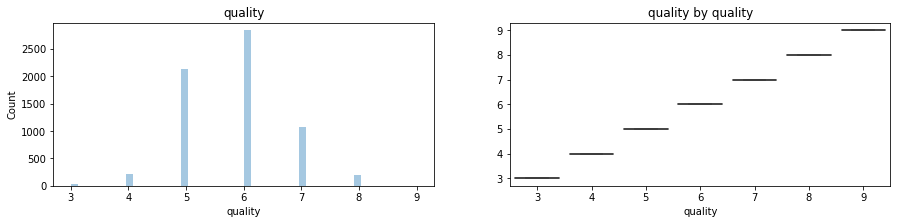

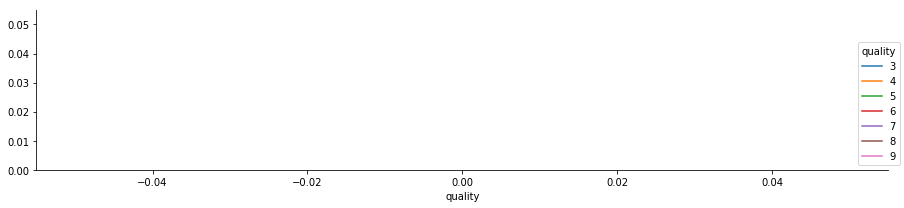

In [32]:
for plot_element in feat_labels_:
    plot_var(plot_element, plot_element, continuous=True)

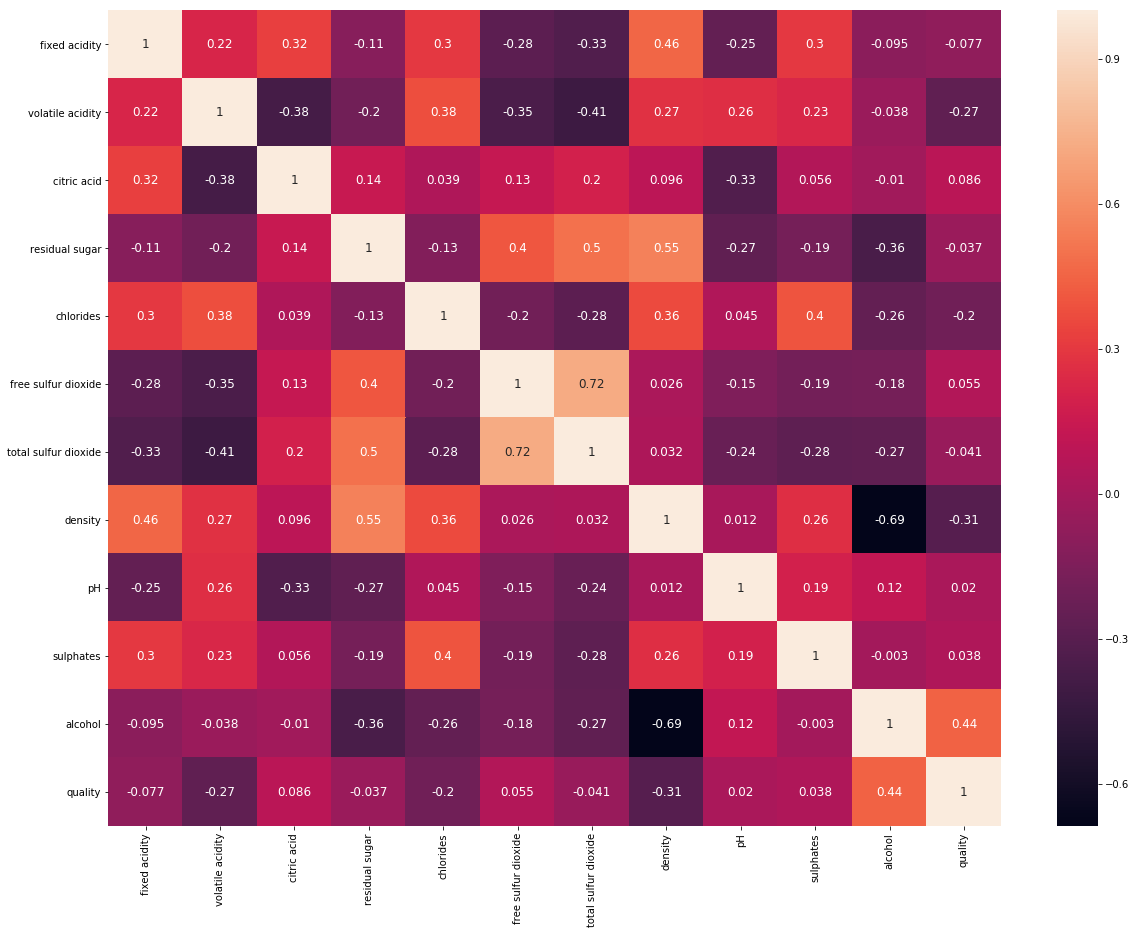

In [33]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### we can see that density and alchol are highly correlated 

In [34]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.30)

train_y = train['quality']
test_y = test['quality']
 
train_x = train
train_x.pop('quality')
test_x = test
test_x.pop('quality')

2379    4
984     5
3663    6
3145    6
1010    6
3858    6
3703    6
4205    6
2570    5
4252    6
319     6
292     6
1751    7
3226    6
2211    6
807     7
3689    8
877     6
797     6
652     5
1011    6
831     4
2953    5
251     6
1321    6
1288    7
896     6
3225    7
1957    6
2385    5
       ..
1141    5
3602    6
2654    5
662     4
3433    7
78      5
413     7
3306    7
3700    5
799     6
3268    6
4373    6
1994    6
151     6
695     6
4381    6
977     5
4180    6
1998    6
1486    6
620     5
1115    8
585     6
4867    6
3944    6
328     6
14      5
3477    7
125     6
968     6
Name: quality, Length: 1950, dtype: int64

In [35]:
#the neural network in Python may have difficulty converging before the maximum number of iterations allowed if the data is not normalized. Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. Note that you must apply the same scaling to the test set for meaningful results. There are a lot of different methods for normalization of data, we will use the built-in StandardScaler for standardization.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(train_x)
# Now apply the transformations to the data:
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
 
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
 
test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
 


Intercept: [-5.48628956 -3.69419605 -0.94899989 -0.295229   -2.0606931  -4.09410907
 -6.45060919]
Regression: [[ 0.8985793   0.46596326 -0.17374926  0.36875466  0.35772174  0.33691766
   0.23477852 -0.6378019   0.36935538 -0.51217778 -0.25909303]
 [ 0.03495398  0.53850827  0.04117682 -0.13934188 -0.09635588 -0.76293731
   0.34579269 -0.46711833  0.00303495 -0.24044287 -0.63854532]
 [-0.15917536  0.53330975  0.06485813 -0.4904489   0.03443843 -0.23478693
   0.40108939  0.38565787 -0.12484592 -0.24594357 -0.92181451]
 [-0.20157579 -0.44852736 -0.07578392 -0.1609323  -0.00537588  0.14119292
  -0.21458707  0.46889523 -0.11207538 -0.00360091  0.37553545]
 [ 0.52495668 -0.65749353 -0.03990824  0.73094199 -0.18526713  0.16632621
  -0.27452088 -0.76369642  0.34682393  0.39277113  0.63646642]
 [ 0.32417476 -0.37254358  0.04936683  0.80393083 -0.09382614  0.22620237
  -0.19192474 -0.79676681  0.36958081  0.13092039  0.57134066]
 [ 0.23784034  0.11553319  0.19004347  0.10336957 -0.09178322  0.295

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#now we want  to impove the accuracy of the model from 53%

In [41]:
# let’s try a log transformation to nullify their effect: 

data['fixed.acidity_log'] = np.log(data['fixed acidity'])
data['chlorides_log'] = np.log(data['chlorides'])
data['volatile.acidity_log'] = np.log(data['volatile acidity'])
data['citric.acid_log'] = np.log(data['citric acid'])
data['residual.sugar_log'] = np.log(data['residual sugar'])
data['free.sulfur.dioxide_log'] = np.log(data['free sulfur dioxide'])
data['total.sulfur.dioxide_log'] = np.log(data['total sulfur dioxide'])
data['density_log'] = np.log(data['density'])
data['sulphates_log'] = np.log(data['sulphates'])
data['quality_2'] = np.where(data['quality']>=5,1,0)

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [44]:
#Remove the old variables , basically you can use data.loc to select your new variables or drop them
data.drop(['quality','citric acid','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','sulphates'], axis = 1, inplace = True)

In [56]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pH,6497.0,3.218501,0.160787,2.720000,3.110000,3.210000,3.320000,4.010000
alcohol,6497.0,10.491801,1.192712,8.000000,9.500000,10.300000,11.300000,14.900000
fixed.acidity_log,6497.0,1.962001,0.164255,1.335001,1.856298,1.945910,2.041220,2.766319
chlorides_log,6497.0,-2.990625,0.431162,-4.710531,-3.270169,-3.057608,-2.733368,-0.492658
volatile.acidity_log,6497.0,-1.180294,0.439046,-2.525729,-1.469676,-1.237874,-0.916291,0.457425
citric.acid_log,6497.0,-inf,NaN,-inf,-1.386294,-1.171183,-0.941609,0.506818
residual.sugar_log,6497.0,1.325705,0.863555,-0.510826,0.587787,1.098612,2.091864,4.186620
free.sulfur.dioxide_log,6497.0,3.216126,0.698635,0.000000,2.833213,3.367296,3.713572,5.666427
total.sulfur.dioxide_log,6497.0,4.563833,0.714447,1.791759,4.343805,4.770685,5.049856,6.086775
density_log,6497.0,-0.005322,0.003012,-0.012974,-0.007689,-0.005123,-0.003015,0.038239


In [61]:
#Its either we can drop citric acid or we can do imputations since it contains Na or infinity values
data.drop(['citric.acid_log'], axis = 1, inplace = True)
feat_labels_ =data.columns
data=data
feat_labels_

Index(['pH', 'alcohol', 'fixed.acidity_log', 'chlorides_log',
       'volatile.acidity_log', 'residual.sugar_log', 'free.sulfur.dioxide_log',
       'total.sulfur.dioxide_log', 'density_log', 'sulphates_log',
       'quality_2'],
      dtype='object')

In [62]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the Quality.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by Quality
    if continuous:
        sns.boxplot(x=col_name, y='quality_2', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by quality_2')
    else:
        Charged_Off_rates = data.groupby(col_name)['ch'].value_counts(normalize=True)[:,1]
        sns.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction quality')
        ax2.set_title('quality Rate by quality status ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by quality_status
    if continuous:  
        facet = sns.FacetGrid(data, hue = 'quality_2', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='quality_2', data=data, order=sorted(data[col_name].unique()) )
     
    plt.tight_layout()
    

C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Desmond Gukwe\Anaconda3\lib

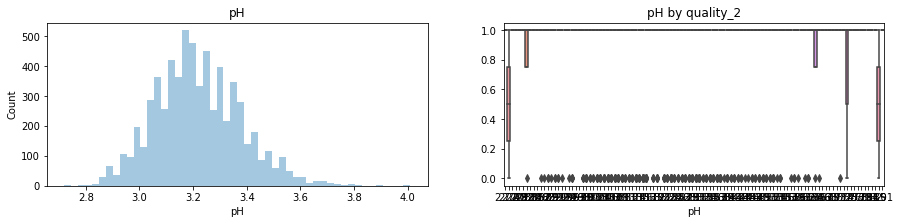

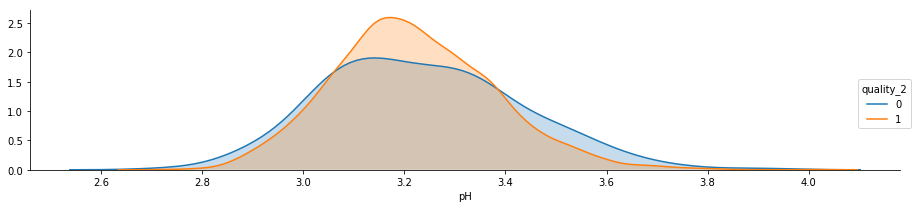

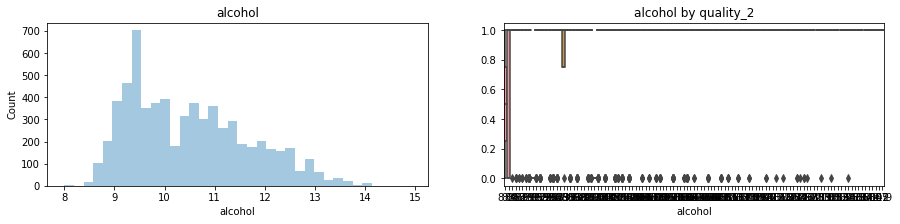

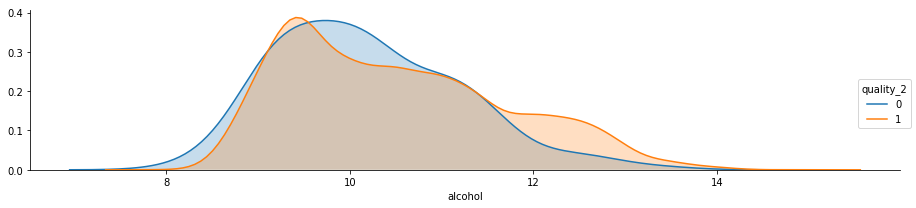

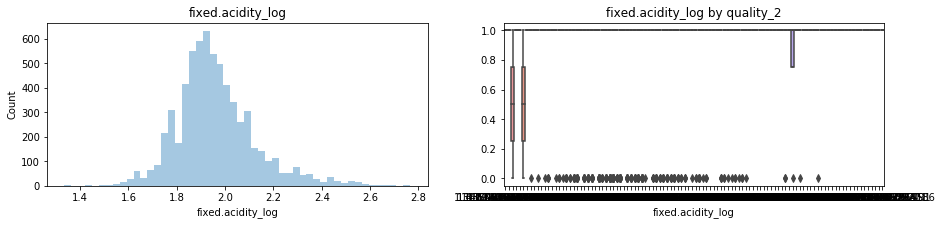

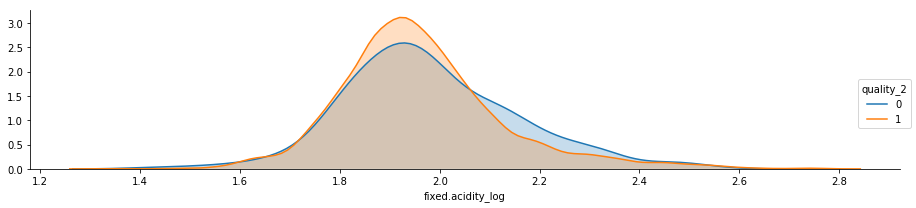

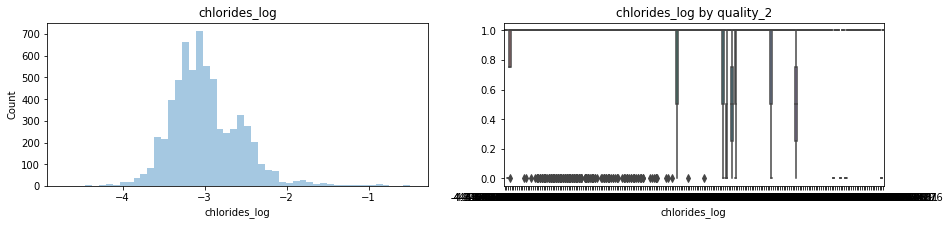

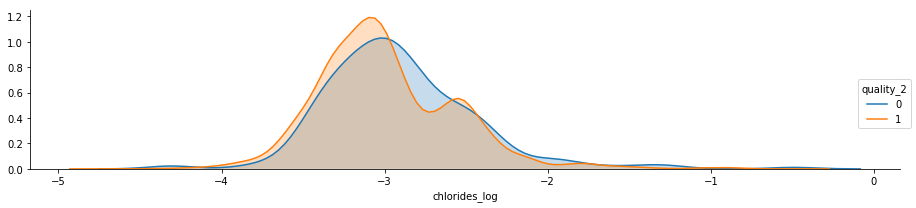

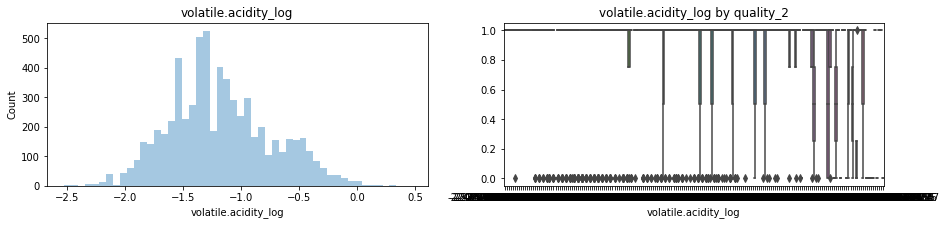

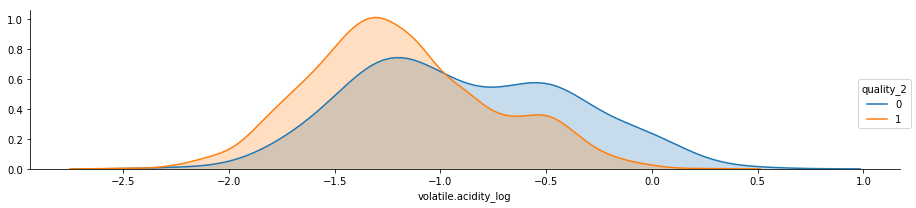

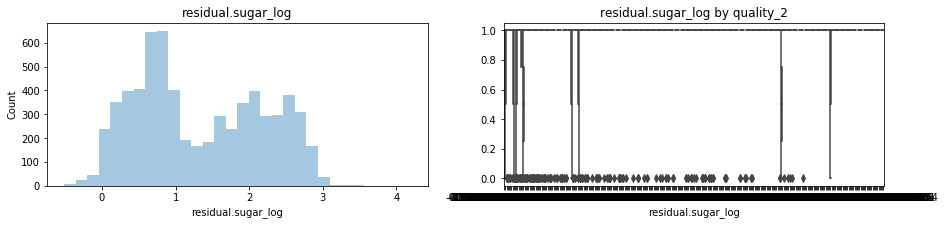

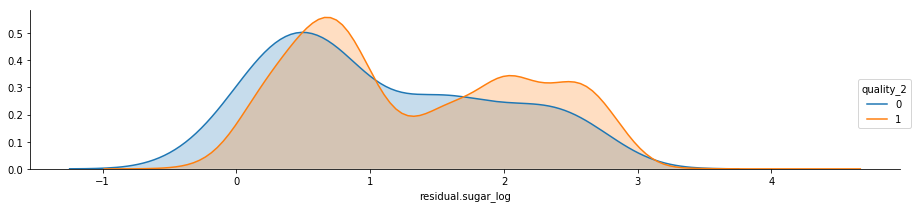

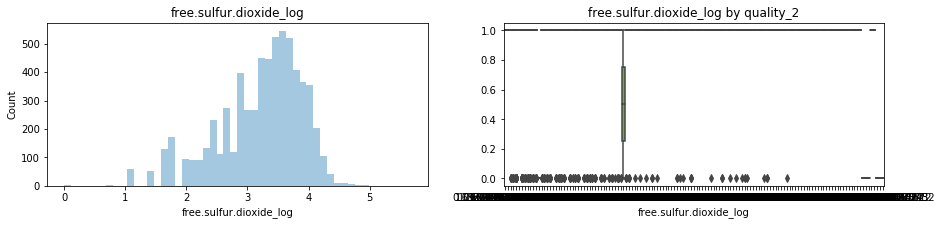

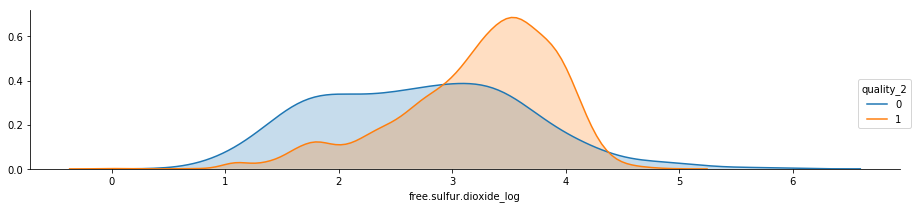

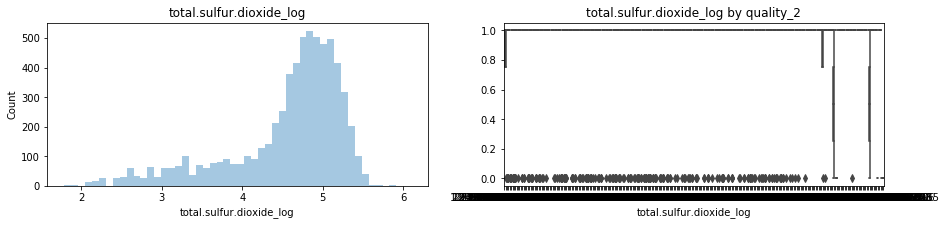

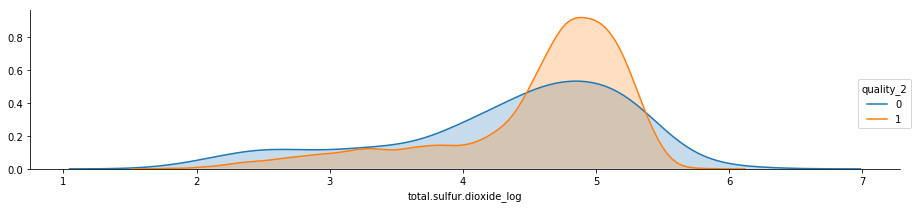

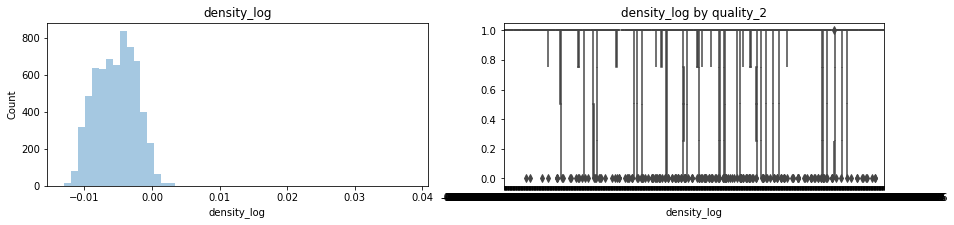

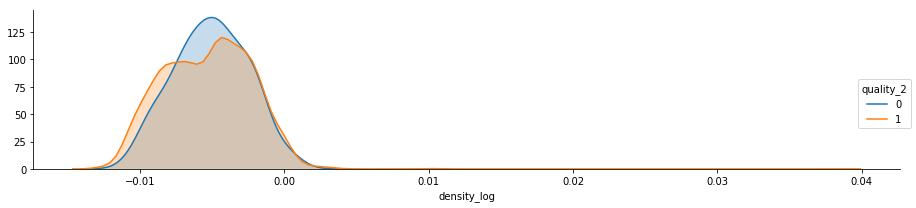

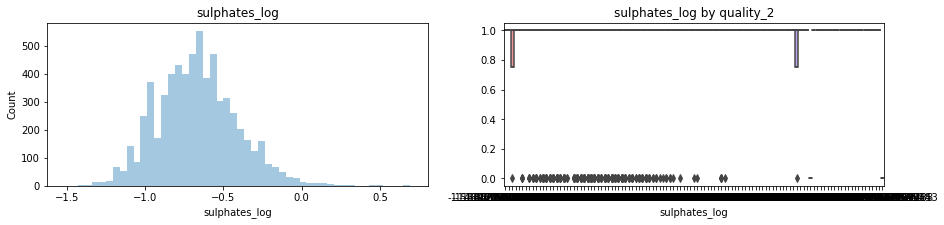

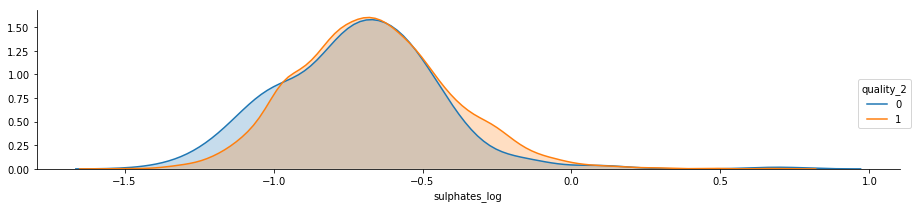

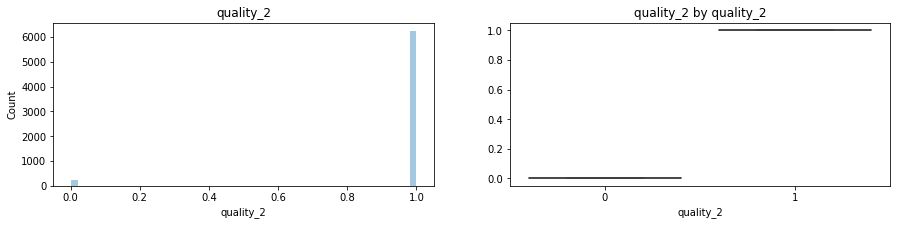

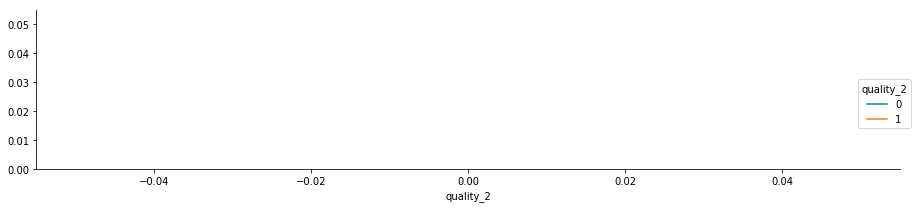

In [63]:
for plot_element in feat_labels_:
    plot_var(plot_element, plot_element, continuous=True)

In [64]:
train, test = train_test_split(data, test_size = 0.30)

train_y = train['quality_2']
test_y = test['quality_2']
 
train_x = train
train_x.pop('quality_2')
test_x = test
test_x.pop('quality_2')

4324    1
212     1
229     1
616     1
1265    1
2013    1
3130    1
3211    1
3433    1
4639    1
1286    1
514     1
4243    1
3390    1
3942    1
3327    1
3458    1
3860    1
4615    1
1693    1
2307    1
1216    1
498     1
1542    1
2309    1
117     1
1047    1
714     1
319     1
1742    1
       ..
1094    1
698     1
3828    1
1402    1
244     1
2056    1
1558    0
1405    0
4649    1
1004    1
3063    1
4525    1
1099    1
1377    1
3268    1
349     1
4376    1
3866    1
358     1
7       1
303     1
3710    1
819     1
2642    1
904     1
509     1
3003    1
1876    1
3932    1
2942    1
Name: quality_2, Length: 1950, dtype: int32

In [68]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x, y=train_y)
 
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
 


Accuracy of logistic regression classifier on test set: 0.96
